In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Задание 1.

Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

+ Построить точечный график
+ Рассчитать коэффициенты корреляции Пирсона и Спирмена
+ Построить модель линейной регрессии
+ Рассчитать коэффициент детерминации
+ Вывести график остатков

In [247]:
data = pd.read_csv('water.csv')

In [248]:
data.head(2)

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17


### График

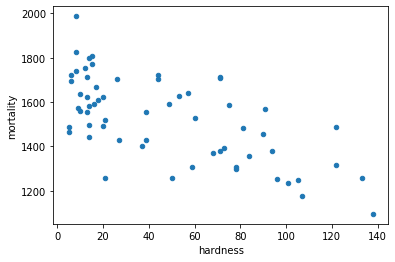

In [249]:
data.plot(kind = 'scatter', x = 'hardness', y = 'mortality')

Визуально выглядит так, как будто есть некоторая обратная связь

### Корреляция Пирсона и Спирмана

In [250]:
data[['mortality', 'hardness']].corr().round(2)

,mortality,hardness
mortality,1.00,-0.65
hardness,-0.65,1.00


In [251]:
data[['mortality', 'hardness']].corr(method = 'spearman').round(2)

,mortality,hardness
mortality,1.00,-0.63
hardness,-0.63,1.00


Наличие обратной зависимости подтверждается 

### Строим модель

In [252]:
X = data[['hardness']]
y = data['mortality']

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [254]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [255]:
y_pred = model.predict(X_test)
y_pred

array([1667.30302065, 1642.56488828, 1670.83703956, 1423.45571585,
       1642.56488828, 1631.96283155, 1218.48261907, 1667.30302065,
       1331.57122419, 1370.4454322 , 1366.91141329, 1642.56488828,
       1639.03086937, 1639.03086937, 1557.74843443, 1402.25160239])

### Коэффициент детерминации вручную

In [256]:
SSres = sum([(i - n) for i, n in zip(y_pred, y_test)]) 
SStot = sum([ (sum(y_train) / len(y_train)) - i for i in y_test])
R2 = 1 - (SSres / SStot)
R2

0.6077382047213173

### Коэффициент детерминации через score

In [257]:
model.score(X_test, y_test)

0.4060533421296777

Не очень понятно, почему они разные. Каждый отдельный прогноз построен неплохо

In [258]:
print( [round((i / n),2) for i, n in zip(y_pred, y_test)] )

[0.98, 0.96, 1.14, 0.9, 1.05, 1.03, 0.97, 0.97, 1.08, 0.94, 0.87, 1.01, 1.1, 0.91, 1.11, 0.94]


### График остатков

In [259]:
Y_const = [0 for i in range(len(X_test))]
print(Y_const)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


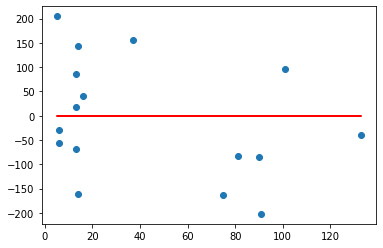

In [260]:
plt.scatter(X_test, y_pred - y_test)
plt.plot(X_test, Y_const, c='r')

+ Закономерность изменения ошибки есть, но она не выглядитсущественной на данном числе наблюденний
+ С ростом X ошибка становится более отрицательной, но возможно недостаточно наблюдений

# Задание 2.

Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы

Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [261]:
data_s = data[ data['location'] == 'South' ]
data_n = data[ data['location'] == 'North' ]

In [262]:
data_s.head(3)

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78


In [263]:
data_n .head(3)

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


## Исследуем Юг

#### График

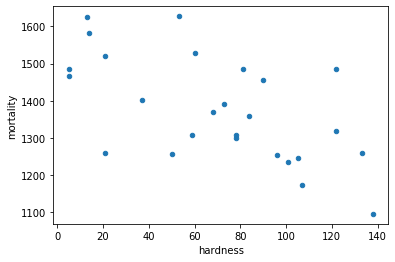

In [264]:
data_s.plot(kind = 'scatter', x = 'hardness', y = 'mortality')

Визуально выглядит так, как будто обратная связь тут слабее, ее почти нет

#### Корреляция Пирсона и Спирмана

In [265]:
data_s[['mortality', 'hardness']].corr().round(2)

,mortality,hardness
mortality,1.0,-0.6
hardness,-0.6,1.0


In [266]:
data_s[['mortality', 'hardness']].corr(method = 'spearman').round(2)

,mortality,hardness
mortality,1.0,-0.6
hardness,-0.6,1.0


При этом корреляция все равно высокая, на том же уровне

#### Строим модель

In [267]:
X = data_s[['hardness']]
y = data_s['mortality']

In [268]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [269]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [270]:
y_pred = model.predict(X_test)
y_pred

array([1324.9266783 , 1400.66924669, 1344.76401764, 1355.58438455,
       1398.86585221, 1258.20108233, 1384.43869632])

#### Коэффициент детерминации вручную

In [271]:
SSres = sum([(i - n) for i, n in zip(y_pred, y_test)]) 
SStot = sum([ (sum(y_train) / len(y_train)) - i for i in y_test])
R2 = 1 - (SSres / SStot)
R2

0.7046520529607208

#### Коэффициент детерминации через score

In [272]:
model.score(X_test, y_test)

0.40690717891819594

На score повторился результат, вручную к-т стал даже повыше

In [273]:
print( [round((i / n),2) for i, n in zip(y_pred, y_test)] )

[1.07, 1.07, 0.92, 1.0, 0.92, 1.15, 1.01]


#### График остатков

In [274]:
Y_const = [0 for i in range(len(X_test))]
print(Y_const)

[0, 0, 0, 0, 0, 0, 0]


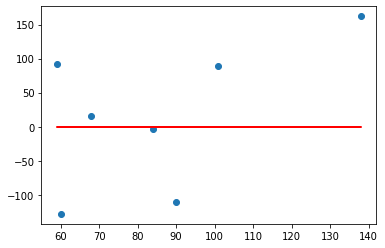

In [275]:
plt.scatter(X_test, y_pred - y_test)
plt.plot(X_test, Y_const, c='r')

+ Прогноз не выглядит надежным - отклонения растут с ростом X, становятся сильно положительными
+ ВОзможно такжепроблема в числе наблюдений, но в целом по графику видно что прогнозы ненадежны

## Исследуем Север

#### График

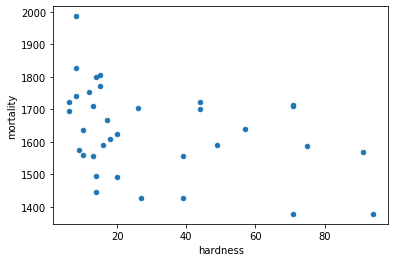

In [276]:
data_n.plot(kind = 'scatter', x = 'hardness', y = 'mortality')

Визуально выглядит так, как будто связи должно  быть меньше чем на юге

#### Корреляция Пирсона и Спирмана

In [277]:
data_n[['mortality', 'hardness']].corr().round(2)

,mortality,hardness
mortality,1.00,-0.37
hardness,-0.37,1.00


In [278]:
data_n[['mortality', 'hardness']].corr(method = 'spearman').round(2)

,mortality,hardness
mortality,1.0,-0.4
hardness,-0.4,1.0


Корреляция ниже. Угадали!

#### Строим модель

In [279]:
X = data_n[['hardness']]
y = data_n['mortality']

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [281]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [282]:
y_pred = model.predict(X_test)
y_pred

array([1449.10205098, 1579.91575829, 1674.54695082, 1504.76745835,
       1646.71424714, 1493.63437687, 1685.68003229, 1663.41386935,
       1680.11349156])

#### Коэффициент детерминации вручную

In [283]:
SSres = sum([(i - n) for i, n in zip(y_pred, y_test)]) 
SStot = sum([ (sum(y_train) / len(y_train)) - i for i in y_test])
R2 = 1 - (SSres / SStot)
R2

-0.7927956537230121

#### Коэффициент детерминации через score

In [284]:
model.score(X_test, y_test)

-0.3195480942489499

Оба коэффициента отрицательные. Модель плохо объясняет взаимосвязь, что было видно еще на первом графике

In [285]:
print( [round((i / n),2) for i, n in zip(y_pred, y_test)] )

[0.92, 0.93, 1.07, 0.88, 1.01, 0.94, 0.99, 1.11, 0.85]


#### График остатков

In [286]:
Y_const = [0 for i in range(len(X_test))]
print(Y_const)

[0, 0, 0, 0, 0, 0, 0, 0, 0]


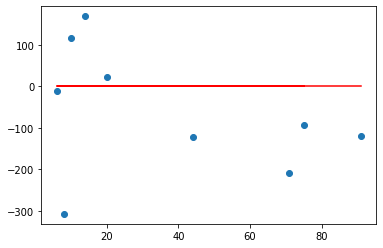

In [287]:
plt.scatter(X_test, y_pred - y_test)
plt.plot(X_test, Y_const, c='r')

+ Результат лучше чем на Севере, но сростом X отклонения становятся отрицательными кроме одного выброса в левом нижнем углу
+ Возможно при большем числе наблюдений мы бы увидели более явно ненадежность модели

- - - - - - - - - - - - - - - - 

Изначально числовые показатели продемонстрировали невысокую надежность прогнозной модели как на общем контуре, так и в большей степени в разбивке по регионам. 

Визуальный анализ это подтвердил

Северные города на общем контуре создают иллюзию наличия закономерности, но сами по себе линейную зависимость не подтверждают